In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

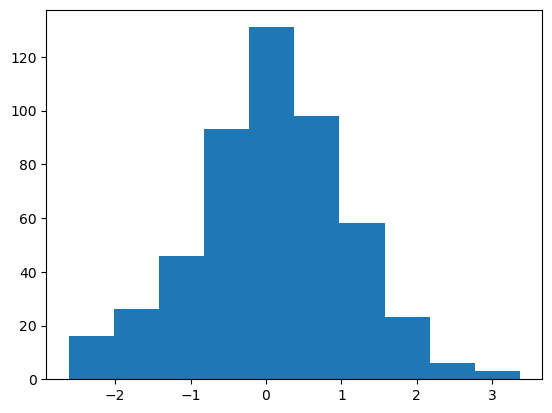

In [28]:
np.random.seed(151)

random_values = np.random.standard_normal(500)
random_values
plt.hist(random_values)
plt.show()

In [29]:
# Generating a random walk from the steps

# Initializing the first step to 5
random_values[0] = 5

# Generating a random walk by using the cumsum function
random_walk = np.cumsum(random_values)

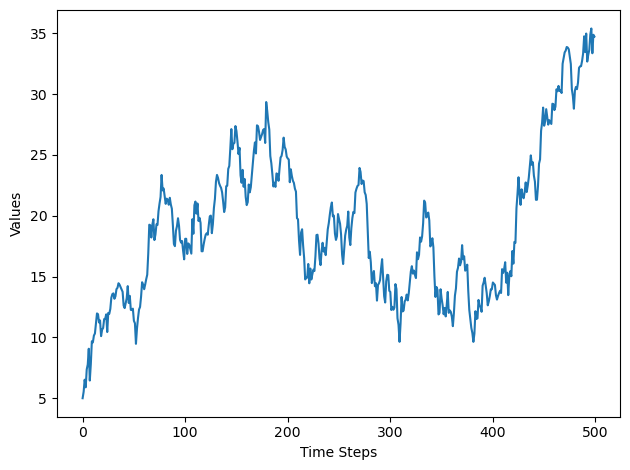

In [30]:
# Plot the simulated random walk

fig,ax = plt.subplots()

plt.plot(random_walk)
ax.set_xlabel('Time Steps')
ax.set_ylabel('Values')
plt.tight_layout()

In [31]:
# Test for stationarity

ADF = adfuller(random_walk)

print(f"ADF statistic: {ADF[0]}")
print(f"p-value: {ADF[1]}")

ADF statistic: -1.6462002082624902
p-value: 0.4590228744264005


#### The ADF statistic is not a high negative and the p value is greater than 0.05, So this random walk is not stationary. So we perform first order differencing

In [32]:
# First order differencing
diff_random_walk = np.diff(random_walk,n=1)

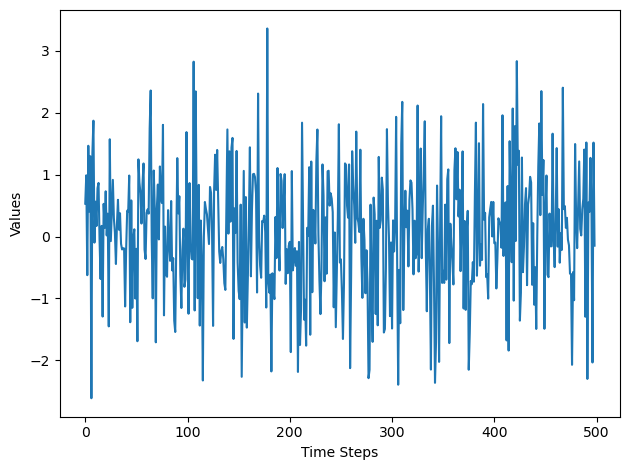

In [33]:
# Plot the first order differenced random walk

fig,ax = plt.subplots()

plt.plot(diff_random_walk)
ax.set_xlabel('Time Steps')
ax.set_ylabel('Values')
plt.tight_layout()

In [34]:
# Perform AD Fuller test to check for stationarity
ADF = adfuller(diff_random_walk)

print(f"ADF statistic: {ADF[0]}")
print(f"p-value: {ADF[1]}")

ADF statistic: -22.38716425754854
p-value: 0.0


#### The adf stat is highly negative and the p value is 0 which is less than 0.05, so we can infer that the differenced random walk is stationary, So we can perform forecasting on this series.

In [26]:
print(len(random_walk))
print(len(diff_random_walk))

500
499


In [36]:
# Splitting the random walk into train and test sets

df = pd.DataFrame({'value': random_walk})

train = df[0:400]
test = df[400:]

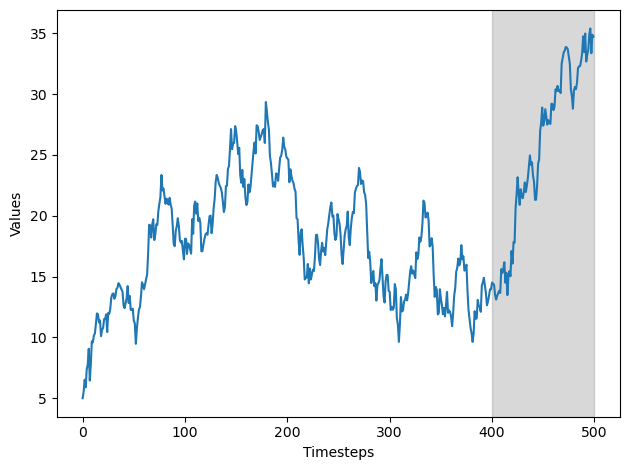

In [44]:
fig, ax = plt.subplots()

ax.plot(df['value'])
ax.set_xlabel('Timesteps')
ax.set_ylabel('Values')
ax.axvspan(xmin=400,xmax=500,color ='#808080',alpha = 0.3 )
plt.tight_layout()



In [51]:
# Forecasting using different naive forecasting methods

# mean value prediction
mean = np.mean(train).value

test.loc[:,'pred_mean'] = mean

test.head()

,value,pred_mean
400,14.514980,17.452702
401,14.407919,17.452702
402,14.310567,17.452702
403,13.471563,17.452702
404,13.109472,17.452702


In [54]:
# predicting using the last value of the train dataset

last_value = train.iloc[-1].value

test.loc[:,'pred_last'] = last_value

test.head()

,value,pred_mean,pred_last
400,14.514980,17.452702,13.955371
401,14.407919,17.452702,13.955371
402,14.310567,17.452702,13.955371
403,13.471563,17.452702,13.955371
404,13.109472,17.452702,13.955371


In [100]:
# drift prediction

deltaX = 400 - 1
deltaY = last_value - 5 # doubt

drift = deltaY / deltaX

x_vals = np.arange(400, 500, 1)

pred_drift = drift * x_vals

test.loc[:, 'pred_drift'] = pred_drift

test.head()

,value,pred_mean,pred_last,pred_drift
400,14.514980,17.452702,13.955371,8.977816
401,14.407919,17.452702,13.955371,9.000260
402,14.310567,17.452702,13.955371,9.022705
403,13.471563,17.452702,13.955371,9.045149
404,13.109472,17.452702,13.955371,9.067594


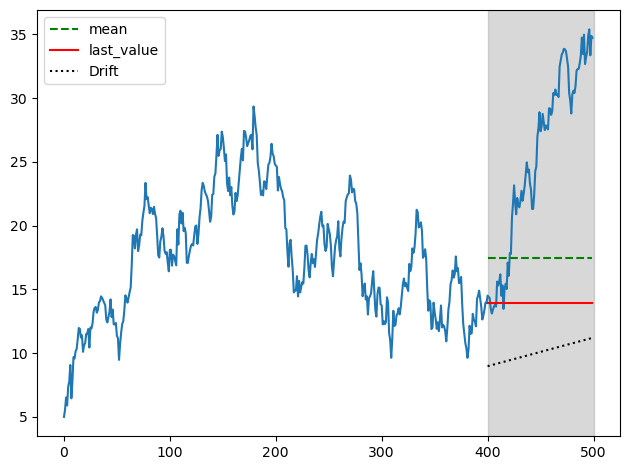

In [101]:
# Plotting the forecasts

fig,ax = plt.subplots()

ax.plot(df['value'])
ax.plot(test['pred_mean'],'g--',label = 'mean')
ax.plot(test['pred_last'],'r-',label = 'last_value')
ax.plot(test['pred_drift'],'k:',label = 'Drift')

ax.axvspan(xmin=400,xmax=500,color ='#808080',alpha = 0.3 )
ax.legend(loc = 2)
plt.tight_layout()

In [102]:
mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])

print(mse_mean, mse_last, mse_drift)

112.01804405631906 179.96107839834625 275.2777283406126


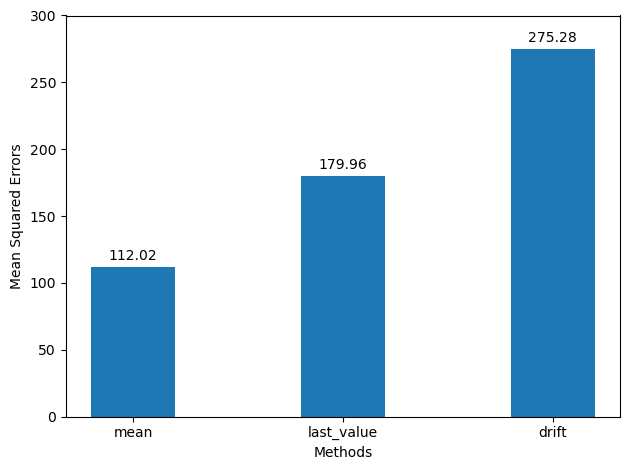

In [103]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift']
y = [mse_mean, mse_last, mse_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('Mean Squared Errors')
ax.set_ylim(0, 300)

for index, value in enumerate(y):
    plt.text(x=index, y=value+5, s=str(round(value, 2)), ha='center')

plt.tight_layout()


In [93]:
# Forecasting the next steps

df_shift = df.shift(1)

df_shift.head()

,value
0,NaN
1,5.000000
2,5.531559
3,6.521767
4,5.897632


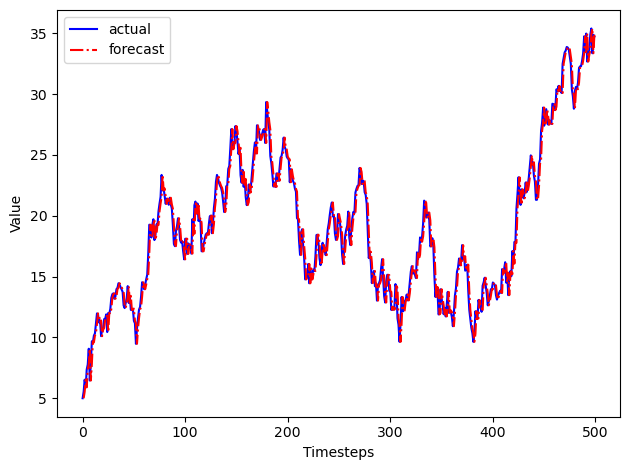

In [98]:
# Plot the forecast over the whole data
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')
ax.legend(loc=2)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

In [97]:
# Finding the error

mse_test = mean_squared_error(test['value'],df_shift[400:])
print(mse_test)

1.078483727184999


#### Yes the MSE decreased

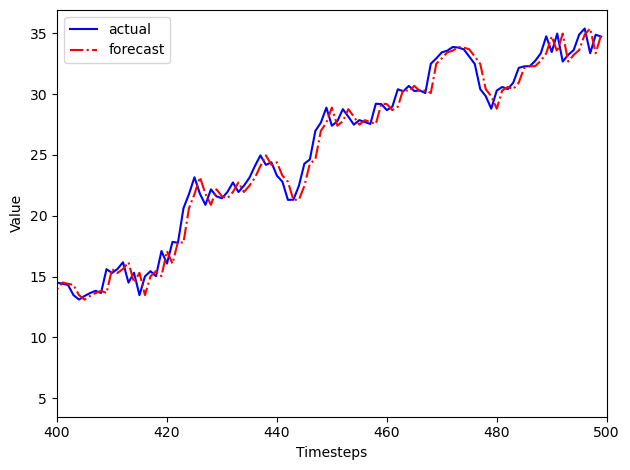

In [99]:
# Plot the forecast over the test
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')
ax.legend(loc=2)

ax.set_xlim(400,500)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()